<a href="https://colab.research.google.com/github/dsaint31x/ML_LINC/blob/master/2021/%EB%B0%95%EC%A7%80%ED%99%98/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

In [ ]:
noisy_moons = datasets.make_moons(
    n_samples = 100,
    noise = .5,
)
X, y = noisy_moons
print('number of X: ', len(X), '/ shape of X: ', X.shape)
print('number of y: ', len(y), '/ shape of y: ', y.shape)

number of X:  100 / shape of X:  (100, 2)
number of y:  100 / shape of y:  (100,)


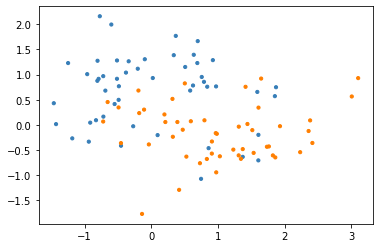

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
colors = np.array(['#377eb8', '#ff7f00'])

plt.scatter(
    X[:,0],
    X[:,1],
    s = 10,
    color=colors[y])

In [ ]:
# accuracy
# precision
# recall
# f1 score
# linearSVC, SVC 를 통해 해보기
# 28일까지 제출하기

In [ ]:
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

linear_svc = LinearSVC(C=1)
rbf_svc = SVC(kernel="rbf", gamma=5, C=1)

scaled_linear_svc = Pipeline([
        ("scaler", scaler),
        ("linear_svc", linear_svc),
    ])
scaled_rbf_svc = Pipeline([
        ("scaler", scaler),
        ("rbf_svc", rbf_svc),
    ])
scaled_linear_svc.fit(X, y)
scaled_rbf_svc.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('rbf_svc',
                 SVC(C=1, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma=5, kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [ ]:
def score(model, X, y):
  print("-----------------------------------------------")
  print("accuracy_score\t:\t", accuracy_score(y, model.predict(X)))
  print("precision_score\t:\t", precision_score(y, model.predict(X)))
  print("recall_score\t:\t", recall_score(y, model.predict(X)))
  print("f1_score\t:\t", f1_score(y, model.predict(X)))
  print("-----------------------------------------------")

In [ ]:
score(scaled_linear_svc, X, y)
score(scaled_rbf_svc, X, y)

-----------------------------------------------
accuracy_score	:	 0.79
precision_score	:	 0.7959183673469388
recall_score	:	 0.78
f1_score	:	 0.7878787878787878
-----------------------------------------------
-----------------------------------------------
accuracy_score	:	 0.88
precision_score	:	 0.88
recall_score	:	 0.88
f1_score	:	 0.88
-----------------------------------------------


In [ ]:
c_list = [0.000000000000000000000000000001, 0.00000000000001,0.0000001, 0.00001, 0.00005 ,0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 200, 500, 1000, 10000]
lin_acc = []
lin_pre = []
lin_rec = []
lin_f1 = []
lin_best_acc = 0
lin_best_pre = 0
lin_best_rec = 0
lin_best_f1 = 0
lin_best_acc_c = 0
lin_best_pre_c = 0
lin_best_rec_c = 0
lin_best_f1_c = 0

for i in c_list:
  linear_svc = LinearSVC(C=i, random_state=42)
  scaled_linear_svc = Pipeline([
        ("scaler", scaler),
        ("linear_svc", linear_svc),
    ])
  scaled_linear_svc.fit(X, y)
  lin_acc.append(accuracy_score(y, scaled_linear_svc.predict(X)))
  lin_pre.append(precision_score(y, scaled_linear_svc.predict(X)))
  lin_rec.append(recall_score(y, scaled_linear_svc.predict(X)))
  lin_f1.append(f1_score(y, scaled_linear_svc.predict(X)))
  if accuracy_score(y, scaled_linear_svc.predict(X)) > lin_best_acc:
    lin_best_acc = accuracy_score(y, scaled_linear_svc.predict(X))
    lin_best_acc_c = i
  if precision_score(y, scaled_linear_svc.predict(X)) > lin_best_pre:
    lin_best_pre = precision_score(y, scaled_linear_svc.predict(X))
    lin_best_pre_c = i
  if recall_score(y, scaled_linear_svc.predict(X)) > lin_best_rec:
    lin_best_rec = recall_score(y, scaled_linear_svc.predict(X))
    lin_best_rec_c = i
  if f1_score(y, scaled_linear_svc.predict(X)) > lin_best_f1:
    lin_best_f1 = f1_score(y, scaled_linear_svc.predict(X))
    lin_best_f1_c = i

print("lin_best_acc : {:.2f}".format(lin_best_acc), "\tC : ", lin_best_acc_c)
print("lin_best_pre : {:.2f}".format(lin_best_pre), "\tC : ", lin_best_pre_c)
print("lin_best_rec : {:.2f}".format(lin_best_rec), "\tC : ", lin_best_rec_c)
print("lin_best_f1 : {:.2f}".format(lin_best_f1), "\tC : ", lin_best_f1_c)

lin_best_acc : 0.81 	C :  1e-30
lin_best_pre : 0.80 	C :  1e-30
lin_best_rec : 0.82 	C :  1e-30
lin_best_f1 : 0.81 	C :  1e-30


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

In [ ]:
c_list = [0.00000001, 0.0000001, 0.00001, 0.00005 ,0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 200, 500, 1000, 10000]
gamma_list = [0.00000001, 0.0000001, 0.00001, 0.00005 ,0.0001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50, 100, 200, 500, 1000, 10000]
rbf_acc = []
rbf_pre = []
rbf_rec = []
rbf_f1 = []
rbf_best_acc = 0
rbf_best_pre = 0
rbf_best_rec = 0
rbf_best_f1 = 0
rbf_best_acc_c = 0
rbf_best_pre_c = 0
rbf_best_rec_c = 0
rbf_best_f1_c = 0
rbf_best_acc_gamma = 0
rbf_best_pre_gamma = 0
rbf_best_rec_gamma = 0
rbf_best_f1_gamma = 0

for i in c_list:
  for j in gamma_list:
    rbf_svc = SVC(kernel="rbf", C=i, gamma=j, random_state=42)
    scaled_rbf_svc = Pipeline([
        ("scaler", scaler),
        ("rbf_svc", rbf_svc),
    ])
    scaled_rbf_svc.fit(X, y)
    rbf_acc.append(accuracy_score(y, scaled_rbf_svc.predict(X)))
    rbf_pre.append(precision_score(y, scaled_rbf_svc.predict(X)))
    rbf_rec.append(recall_score(y, scaled_rbf_svc.predict(X)))
    rbf_f1.append(f1_score(y, scaled_rbf_svc.predict(X)))
    if accuracy_score(y, scaled_rbf_svc.predict(X)) > rbf_best_acc:
      rbf_best_acc = accuracy_score(y, scaled_rbf_svc.predict(X))
      rbf_best_acc_c = i
      rbf_best_acc_gamma = j
    if precision_score(y, scaled_rbf_svc.predict(X)) > rbf_best_pre:
      rbf_best_pre = precision_score(y, scaled_rbf_svc.predict(X))
      rbf_best_pre_c = i
      rbf_best_pre_gamma = j
    if recall_score(y, scaled_rbf_svc.predict(X)) > rbf_best_rec:
      rbf_best_rec = recall_score(y, scaled_rbf_svc.predict(X))
      rbf_best_rec_c = i
      rbf_best_rec_gamma = j
    if f1_score(y, scaled_rbf_svc.predict(X)) > rbf_best_f1:
      rbf_best_f1 = f1_score(y, scaled_rbf_svc.predict(X))
      rbf_best_f1_c = i
      rbf_best_f1_gamma = j

print("rbf_best_acc : {:.2f}".format(rbf_best_acc), "\tC : ", rbf_best_acc_c, "\tgamma : ", rbf_best_acc_gamma)
print("rbf_best_pre : {:.2f}".format(rbf_best_pre), "\tC : ", rbf_best_pre_c, "\tgamma : ", rbf_best_pre_gamma)
print("rbf_best_rec : {:.2f}".format(rbf_best_rec), "\tC : ", rbf_best_rec_c, "\tgamma : ", rbf_best_rec_gamma)
print("rbf_best_f1 : {:.2f}".format(rbf_best_f1), "\tC : ", rbf_best_f1_c, "\tgamma : ", rbf_best_f1_gamma)

rbf_best_acc : 1.00 	C :  1e-08 	gamma :  200
rbf_best_pre : 1.00 	C :  1e-08 	gamma :  200
rbf_best_rec : 1.00 	C :  1e-08 	gamma :  50
rbf_best_f1 : 1.00 	C :  1e-08 	gamma :  200


In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

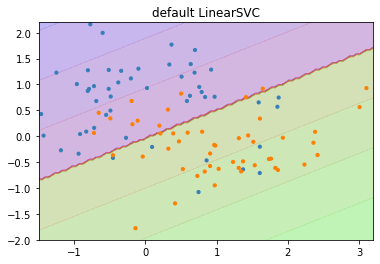

-----------------------------------------------
accuracy_score	:	 0.79
precision_score	:	 0.7959183673469388
recall_score	:	 0.78
f1_score	:	 0.7878787878787878
-----------------------------------------------


In [ ]:
lin_svc_test = Pipeline([
        ("scaler", scaler),
        ("lin_svc", LinearSVC(random_state=42)),
    ])
lin_svc_test.fit(X, y)

plot_predictions(lin_svc_test, [-1.5, 3.2, -2, 2.2])
plt.scatter(
    X[:,0],
    X[:,1],
    s = 10,
    color=colors[y])
plt.title("default LinearSVC")
plt.show()

score(lin_svc_test, X, y)

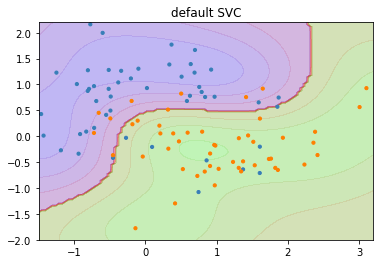

-----------------------------------------------
accuracy_score	:	 0.84
precision_score	:	 0.84
recall_score	:	 0.84
f1_score	:	 0.8399999999999999
-----------------------------------------------


In [ ]:
rbf_svc_test = Pipeline([
        ("scaler", scaler),
        ("rbf_svc", SVC(random_state=42)),
    ])
rbf_svc_test.fit(X, y)

plot_predictions(rbf_svc_test, [-1.5, 3.2, -2, 2.2])
plt.scatter(
    X[:,0],
    X[:,1],
    s = 10,
    color=colors[y])
plt.title("default SVC")
plt.show()

score(rbf_svc_test, X, y)

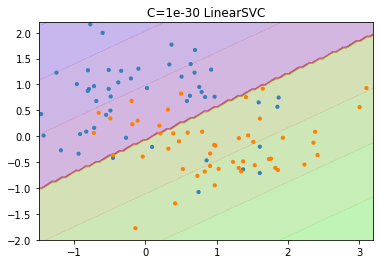

-----------------------------------------------
accuracy_score	:	 0.81
precision_score	:	 0.803921568627451
recall_score	:	 0.82
f1_score	:	 0.8118811881188118
-----------------------------------------------


In [ ]:
lin_svc_test = Pipeline([
        ("scaler", scaler),
        ("lin_svc", LinearSVC(C=1e-30,random_state=42)),
    ])
lin_svc_test.fit(X, y)

plot_predictions(lin_svc_test, [-1.5, 3.2, -2, 2.2])
plt.scatter(
    X[:,0],
    X[:,1],
    s = 10,
    color=colors[y])
plt.title("C=1e-30 LinearSVC")
plt.show()

score(lin_svc_test, X, y)

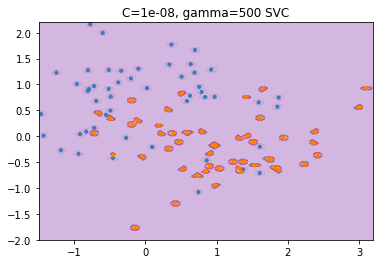

-----------------------------------------------
accuracy_score	:	 1.0
precision_score	:	 1.0
recall_score	:	 1.0
f1_score	:	 1.0
-----------------------------------------------


In [ ]:
rbf_svc_test = Pipeline([
        ("scaler", scaler),
        ("rbf_svc", SVC(C=1e-08, gamma=500,random_state=42)),
    ])
rbf_svc_test.fit(X, y)

plot_predictions(rbf_svc_test, [-1.5, 3.2, -2, 2.2])
plt.scatter(
    X[:,0],
    X[:,1],
    s = 10,
    color=colors[y])
plt.title("C=1e-08, gamma=500 SVC")
plt.show()

score(rbf_svc_test, X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


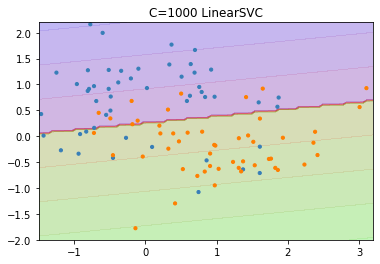

-----------------------------------------------
accuracy_score	:	 0.77
precision_score	:	 0.7547169811320755
recall_score	:	 0.8
f1_score	:	 0.7766990291262137
-----------------------------------------------


In [ ]:
lin_svc_test = Pipeline([
        ("scaler", scaler),
        ("lin_svc", LinearSVC(C=1000,random_state=42)),
    ])
lin_svc_test.fit(X, y)

plot_predictions(lin_svc_test, [-1.5, 3.2, -2, 2.2])
plt.scatter(
    X[:,0],
    X[:,1],
    s = 10,
    color=colors[y])
plt.title("C=1000 LinearSVC")
plt.show()

score(lin_svc_test, X, y)

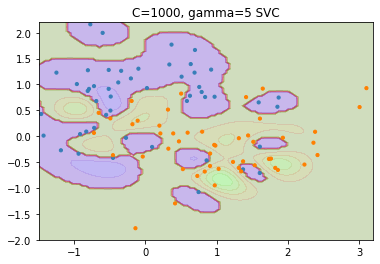

-----------------------------------------------
accuracy_score	:	 1.0
precision_score	:	 1.0
recall_score	:	 1.0
f1_score	:	 1.0
-----------------------------------------------


In [ ]:
rbf_svc_test = Pipeline([
        ("scaler", scaler),
        ("rbf_svc", SVC(C=1000, gamma=5,random_state=42)),
    ])
rbf_svc_test.fit(X, y)

plot_predictions(rbf_svc_test, [-1.5, 3.2, -2, 2.2])
plt.scatter(
    X[:,0],
    X[:,1],
    s = 10,
    color=colors[y])
plt.title("C=1000, gamma=5 SVC")
plt.show()

score(rbf_svc_test, X, y)